==================================== FUNCTIONS =============================

In [22]:
# NLTK
# imports nltk for using tokens when getting unigrams and bigrams
import nltk
nltk.download('punkt')
from nltk import word_tokenize
# ==============================================================================

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
# GET SENTENCE
# function allows to get sentence from dataset
# there must be specified sentence number and dataset name
def getSentence(which, dataset):  # which sentence from dataset
 index = imdb.get_word_index()
 reverse_index = dict([(value, key) for (key, value) in index.items()])
 sentence = " ".join( [reverse_index.get(i - 3, "#") for i in dataset[which]])
 # print(sentence)               # displaye decoded sentence string
 return sentence
 # =============================================================================

In [24]:
# UNIGRAMS FROM DATASET
# function allows to get all unigrams from dataset and prints 20 most used unigrams
def getUnigrams(sentences):
  tUnigrams = []              # temporary array to store unigrams before 20 most used will be selected
  tCounter = []               # counter to check how many times each unigram appears in text
  cUnigrams = []              # used to disply 20 most used unigrams
  unigrams = []               # final array to be returned containing all unigrams

  for sentence in sentences:        # gets sentence from dataset (sentences)
    token = word_tokenize(sentence)   # splits sentence into tokens
    token.pop(0)                      # removes '#'
    for x in token:
      if x not in tUnigrams:          # allows to eliminates duplicates
        tUnigrams.append(x)
        unigrams.append(x)
        tCounter.append(1)
      else:
        i = 0
        for y in tUnigrams:
          if y==x:
            tCounter[i]+=1
          i+=1
  j=0
  while  j<20:                # gets 20 most used unigrams
   value=0
   num=0
   i=0
   for x in tCounter:
     if x>value:
       value=x
       num=i
     i+=1
   cUnigrams.append(tUnigrams[num]+" "+str(tCounter[num]))   # gets unigram and how many times it appears in text
   del tCounter[num]
   del tUnigrams[num]
   j+=1
  print("========================== 20 most used unigrams ====================")
  print(cUnigrams)
  print("=====================================================================")
  return unigrams     # returns list of all unigrams
# ==============================================================================

In [25]:
# UNIGRAMS FROM SENTENCE
# function allows to get all unigrams from single sentence
def getUnigramsFromSentence(sentence):
  token = word_tokenize(sentence)   # splits sentence into tokens
  token.pop(0)                      # removes '#'
  unigrams = []                     # unigrams to be returned
  for x in token:
    if x not in unigrams:           # allows to eliminate duplicates
     unigrams.append(x)
  return unigrams
# ==============================================================================

In [26]:
# BIGRAMS
# function allows to get all bigrams and prints 20 most used bigrams
def getBigrams(dataset):
  tBigrams = []               # temporary array to store bigrams before 20 most used will be selected
  tCounter = []               # counter to check how many times each bigram appears in text
  cBigrams = []               # used to disply 20 most used bigrams
  bigrams = []                # final array to be returned containg all bigrams
  for sentence in dataset:
    token = word_tokenize(sentence)   # splits sentence in tokens
    token.pop(0)                      # removes '#'
    wordsLen = len(token)-1
    i=0
    while i<wordsLen:
      b = token[i]+" "+token[i+1]     # b - bigram
      if b not in tBigrams:           # allows to eliminate duplicates
        tBigrams.append(b)
        bigrams.append(b)
        tCounter.append(1)
      else:
        z = 0
        for y in tBigrams:
          if y==b:
            tCounter[z]+=1
          z+=1
      i+=1

  j=0
  while  j<20:          # gets 20 most used bigrams
   value=0
   num=0
   i=0
   for x in tCounter:
     if x>value:
       value=x
       num=i
     i+=1
   cBigrams.append(tBigrams[num]+" "+str(tCounter[num]))   # gets bigram and how many times it appears in text
   del tCounter[num]
   del tBigrams[num]
   j=j+1
  print("========================== 20 most used bigrams  ====================")
  print(cBigrams)
  print("=====================================================================")
  return bigrams     # returns list of all bigrams
# ==============================================================================

In [27]:
# BIGRAMS FROM SENTENCE
# function allows to get all bigrams from a sentence
def getBigramsFromSentence(sentence):
  bigrams = []                      # temporary list to store bigrams before 20 most common will be selected
  token = word_tokenize(sentence)   # splits sentence in tokens
  token.pop(0)                      # removes '#'
  wordsLen = len(token)-1
  i=0
  while i<wordsLen:
    b = token[i]+" "+token[i+1]
    if b not in bigrams:            # allows to eliminate duplicates
      bigrams.append(b)
    i+=1
  return bigrams     # returns list of all bigrams
# ==============================================================================

In [28]:
# VOCABULARY
# function creates and return vocabulary
# vocabulary will be used to create one-hot encoding vectors
def getVocabulary(dataset):
  vocabulary = []
  for x in dataset:
    if x not in vocabulary:   # allows to eliminate duplicates (there should be none as both unigrams and bigrams have only unique values)
      vocabulary.append(x)
  return vocabulary
# ==============================================================================

In [29]:
# ONE-HOT ENCODING
# function creates and return one-hot encoding vector for sentence
# one-hot encoding vectors will be used as text representation to create decision tree
# one hot encoding is good as choice for a short text (review) representation
def getOneHotEncoding(sentence, vocabulary):
  one_hot_encoding = []
  present = 0
  for x in vocabulary:
    if x in sentence:
      one_hot_encoding.append(1)
    else:
      one_hot_encoding.append(0)
  print(one_hot_encoding)
  return one_hot_encoding
# ==============================================================================

===========================================================================

================================= MODEL ===================================

In [30]:
# STEP 1 - GET DATASET
# loads training dataset which will be used in model
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data()
# ==============================================================================

In [31]:
# STEP 2 - GET SAMPLE DATA
# gets sample from dataset for sentences and positive/negative sentiments (1/0)
# it is beyond capabilities of computer used to create model to process all 25 000 reviews and labels
# sample is picked up randomly
import random
sampleData = []       # holds sample of sentences
sampleLabels = []     # holds sample of labels positive/negative sentiments (1/0)
rNumbers = []         # holds random numbers to eliminate duplicates
i=0
while i<100:          # sample size = 100, number of sentences being used in model
   r = random.randrange(25000)       # random number between 0 and 24999
   if r not in rNumbers:             # checks if r (random number) was not selected before
     rNumbers.append(r)              # adds r to rNumbers to eliminate duplicates
     sampleData.append(getSentence(r, training_data))
     sampleLabels.append(training_targets[r])
     i+=1
print("======================= Sample Data - Sentences =======================")
print(sampleData)
print("=======================================================================")
print("============================ Sample Labels  ===========================")
print(sampleLabels)
print("=======================================================================")
print("=========================== Random Numbers ============================")
print(rNumbers)
print("=======================================================================")
rNumbers.clear()
# ==============================================================================

======================= Sample Data - Sentences =======================
["# the dentist is a really good thriller and pretty disturbing i think we can all agree that the chances of running into a psycho dentist are much bigger than running into monsters vampires or zombies that's exactly why this movie is so scary during this film you'll probably think about your own dentist a few times whether he's capable of doing such things you better pray his wife doesn't cheat on him that's what the story is all about a respected dentist in la snaps when he finds out his wife is cheating on him with the pool boy that must be the greatest profession in the world by the way poolboys always take advantage of the housewives when the husband is at his work from then on our dentist dr feinstone can only thing about taking revenge he can't concentrate on his patients anymore and a couple of them get hurt things aren't made easier for our dentist when he's chased by an annoying tax controller a curious c

In [32]:
# STEP 3 - GETS UNIGRAMS AND BIGRAMS FROM SAMPLE DATASET
unigrams =  getUnigrams(sampleData)   # gets all unique unigrams from sampleData
print("========================== Unigrams: ==================================")
print(unigrams)
print(len(unigrams))
print("=======================================================================")
# GET BIGRAMS from dataset
bigrams = getBigrams(sampleData)      # gets all unique bigrams from sampleData
print("=========================== Bigrams: ==================================")
print(bigrams)
print(len(bigrams))
print("=======================================================================")
# ==============================================================================

========================== 20 most used unigrams ====================
['the 1563', 'a 759', 'and 750', 'of 729', 'to 646', 'is 478', 'br 452', 'in 447', 'it 418', 'that 352', 'i 333', 'this 318', "'s 292", 'film 235', 'with 216', 'was 200', 'as 196', 'for 193', 'but 187', 'movie 164']
========================== Unigrams: ==================================
['the', 'dentist', 'is', 'a', 'really', 'good', 'thriller', 'and', 'pretty', 'disturbing', 'i', 'think', 'we', 'can', 'all', 'agree', 'that', 'chances', 'of', 'running', 'into', 'psycho', 'are', 'much', 'bigger', 'than', 'monsters', 'vampires', 'or', 'zombies', "'s", 'exactly', 'why', 'this', 'movie', 'so', 'scary', 'during', 'film', 'you', "'ll", 'probably', 'about', 'your', 'own', 'few', 'times', 'whether', 'he', 'capable', 'doing', 'such', 'things', 'better', 'pray', 'his', 'wife', 'does', "n't", 'cheat', 'on', 'him', 'what', 'story', 'respected', 'in', 'la', 'snaps', 'when', 'finds', 'out', 'cheating', 'with', 'pool', 'boy', 'must

In [33]:
# STEP 4 - GET VOCABULARY
# there are used bigrams instead of unigrams to catch negation good not good
# and to catch context for instance minister tests and minister's tests
vocabulary = getVocabulary(bigrams)     # creates vocabulary based on bigrams
print(vocabulary)
# ==============================================================================

['the dentist', 'dentist is', 'is a', 'a really', 'really good', 'good thriller', 'thriller and', 'and pretty', 'pretty disturbing', 'disturbing i', 'i think', 'think we', 'we can', 'can all', 'all agree', 'agree that', 'that the', 'the chances', 'chances of', 'of running', 'running into', 'into a', 'a psycho', 'psycho dentist', 'dentist are', 'are much', 'much bigger', 'bigger than', 'than running', 'into monsters', 'monsters vampires', 'vampires or', 'or zombies', 'zombies that', "that 's", "'s exactly", 'exactly why', 'why this', 'this movie', 'movie is', 'is so', 'so scary', 'scary during', 'during this', 'this film', 'film you', "you 'll", "'ll probably", 'probably think', 'think about', 'about your', 'your own', 'own dentist', 'dentist a', 'a few', 'few times', 'times whether', 'whether he', "he 's", "'s capable", 'capable of', 'of doing', 'doing such', 'such things', 'things you', 'you better', 'better pray', 'pray his', 'his wife', 'wife does', "does n't", "n't cheat", 'cheat o

In [34]:
# STEP 5 - GET ONE_HOT ENCODING FOR UNIGRAMS
# finalData = []
# for x in sampleData:
#  tUnigrams =  getUnigramsFromSentence(x)
#  finalData.append(getOneHotEncoding(tUnigrams, vocabulary))
# not used because vocabulary was created based on bigrams
# ==============================================================================

In [35]:
# STEP 5 - GET ONE-HOT ENCODING FOR BIGRAMS
# creates one-hot encoding vectors text representation
# dataset will be used for learning and testing model
finalData = []
for x in sampleData:
  tBigrams =  getBigramsFromSentence(x)
  finalData.append(getOneHotEncoding(tBigrams, vocabulary))
# ==============================================================================

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [36]:
# STEP 6 - SPLITTING DATA
# split is 80/20 which gives enough data for learning and enough data for prediction
# splits finalData dataset into training and testing data
# splits sampleLabels into training and testing labels
num=len(finalData)
split = 8*num/10      # 80% training, 20% testing + 1
rNumbers = []         # holds random numbers to eliminate duplicates
i=0                   # used during looping

trainData = []        # holds training data
trainLabels = []      # holds training labels (1/0)
testData = []         # holds testing data
testLabels = []       # holds testing labels (1/0)

while i<split:          # sample size
   r = random.randrange(1, num)
   if r not in rNumbers:
     rNumbers.append(r)
     trainData.append(finalData[r])
     trainLabels.append(sampleLabels[r])
     i+=1
i=0                   # resetting i

rNumbersLength = len(rNumbers)
removeNumber = random.randrange(1, rNumbersLength)
rNumbers.pop(removeNumber)          # removes one number from rNumbers so there are 20% +1 for testing

# removes data and labels which was already used
for x in range(num):
  if x in finalData:
    finalData.pop(x)                # removes from finalData already selected data for trainData
    sampleLabels.pop(x)             # removes from sampleLabels already selected labels for trainLabels

# gets test data and test labels
while i<num:
  if i not in rNumbers:
    testData.append(finalData[i])
    testLabels.append(sampleLabels[i])
  i+=1

print("============================ Training data  ===========================")
print(len(trainData))
print(len(trainLabels))
print("=======================================================================")
print("============================ Testing data  ============================")
print(len(testData))
print(len(testLabels))
print("=======================================================================")
rNumbers.clear()
# ==============================================================================

============================ Training data  ===========================
80
80
============================ Testing data  ============================
21
21


In [37]:
# STEP 7 - TRAINING TREE
# creates decision tree classifier based on one-hot encoding text representation
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
tree = DecisionTreeClassifier(criterion = 'entropy').fit(trainData,trainLabels)
# ==============================================================================

|--- a lot <= 0.50
|   |--- about this <= 0.50
|   |   |--- i am <= 0.50
|   |   |   |--- that has <= 0.50
|   |   |   |   |--- the whole <= 0.50
|   |   |   |   |   |--- what we <= 0.50
|   |   |   |   |   |   |--- that 's <= 0.50
|   |   |   |   |   |   |   |--- they are <= 0.50
|   |   |   |   |   |   |   |   |--- could have <= 0.50
|   |   |   |   |   |   |   |   |   |--- with the <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- and the <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- and the >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- with the >  0.50
|   |   |   |   |   |   |   |   |   |   |--- unsuitable for <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- unsuitable for >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- 

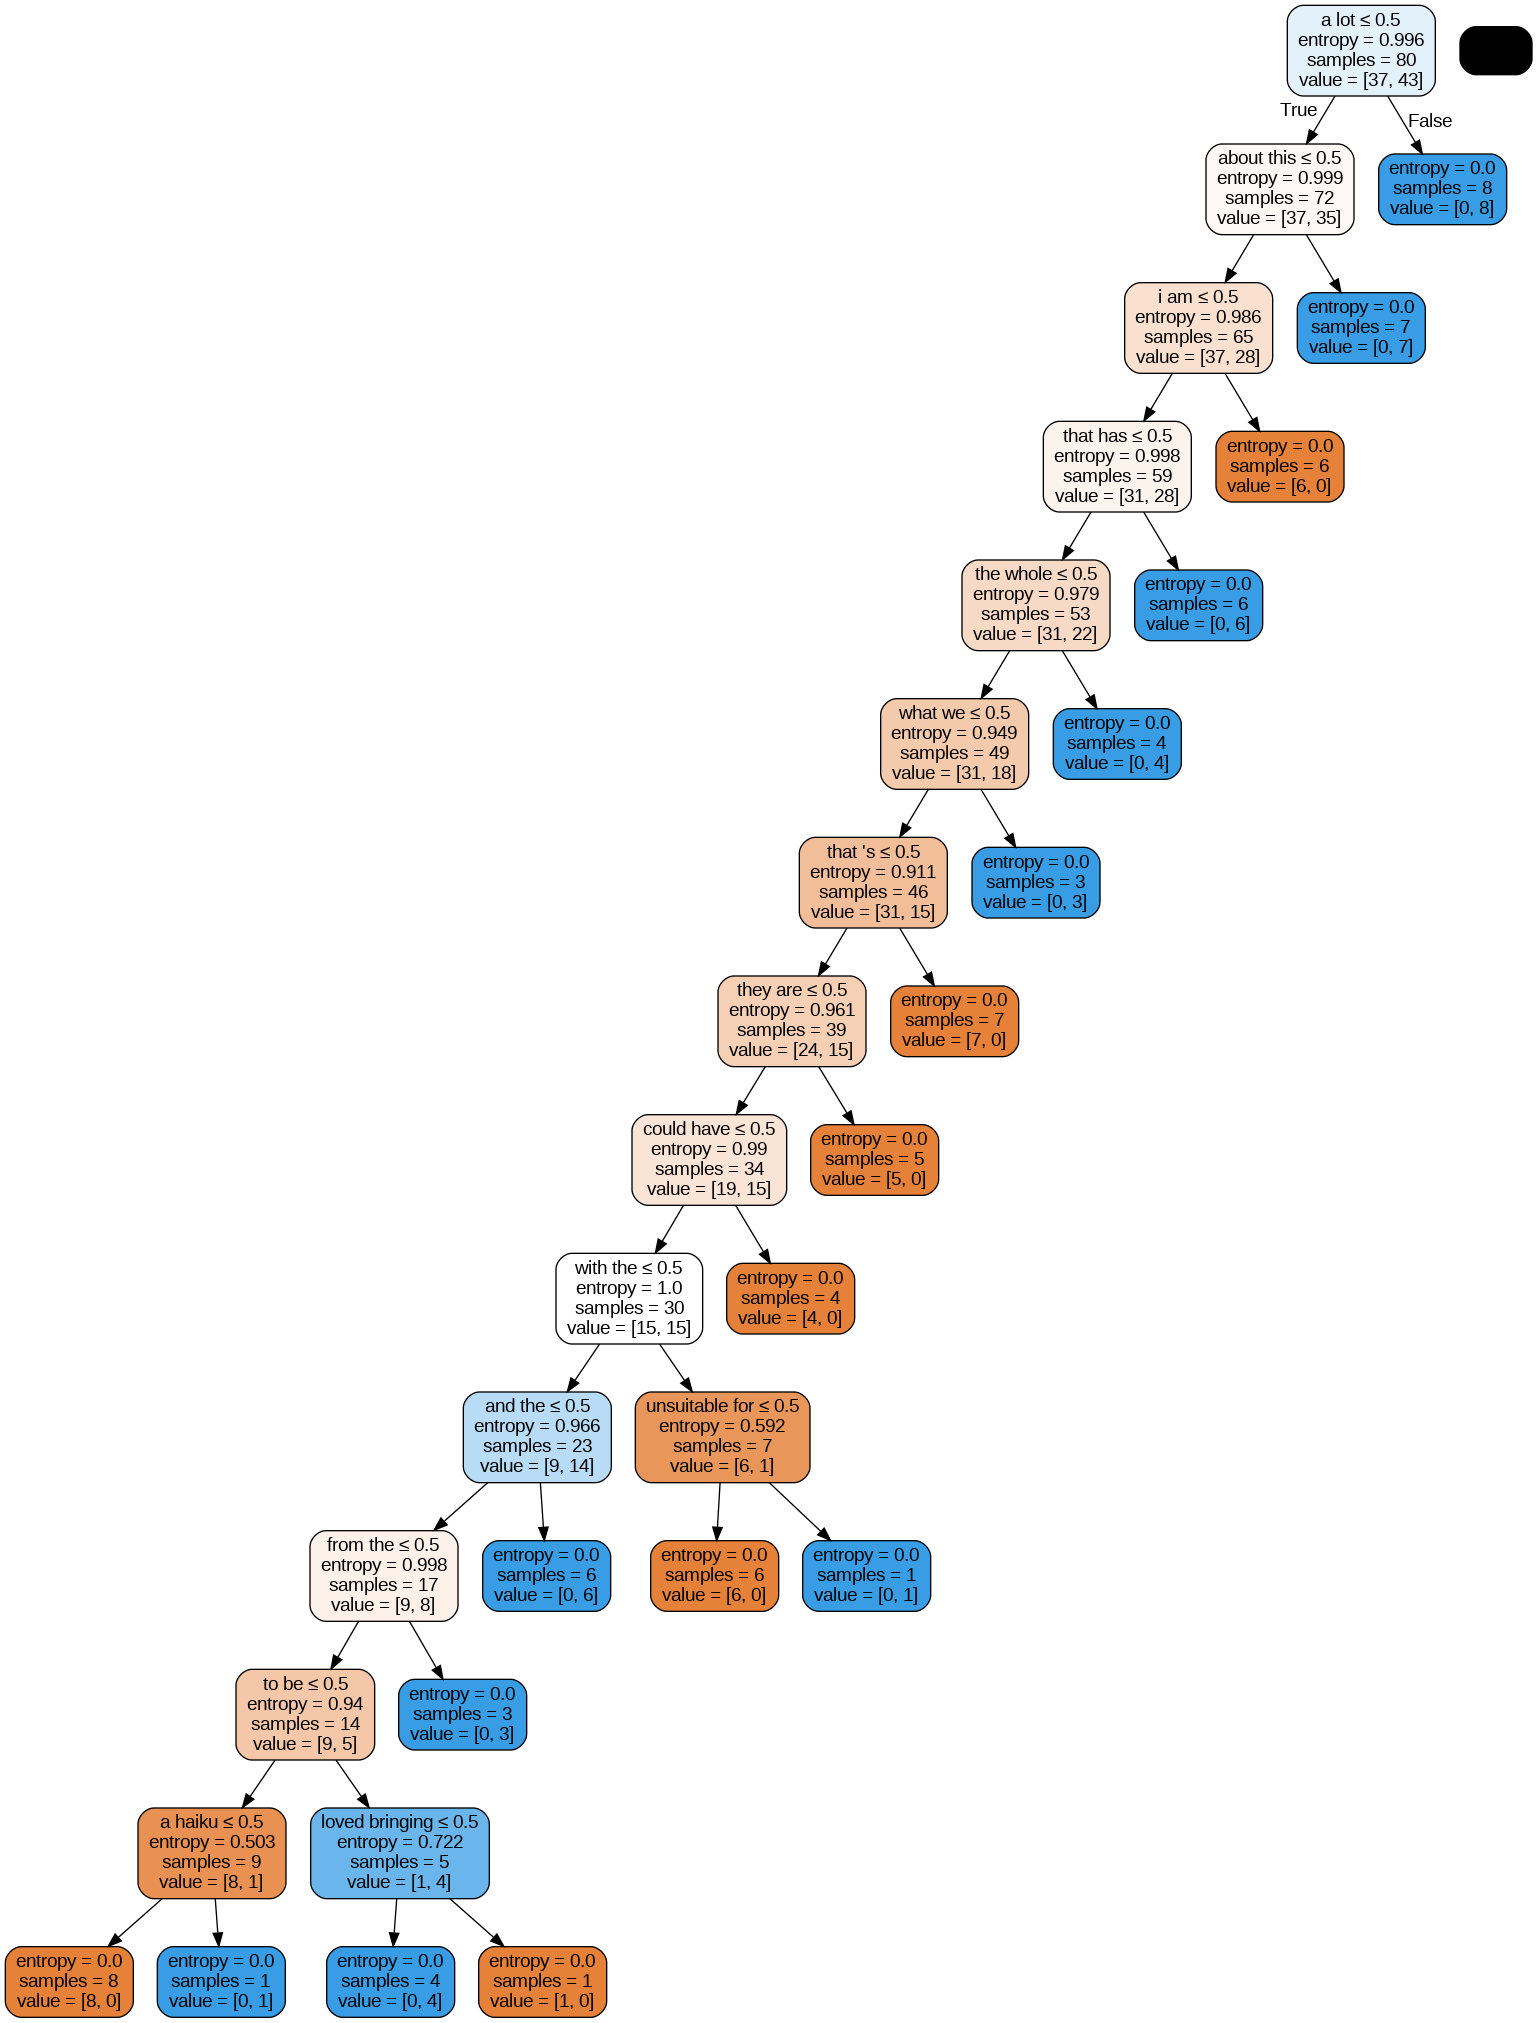

In [38]:
# STEP 8 - DRAWING RULES FOR DECISION TREE AND DECISION TREE
# printing rules for decision tree
rules = export_text(tree, feature_names=vocabulary) # gets rules for decision tree
print(rules)
# ==============================================================================
# drawing decision tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                feature_names=vocabulary,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
# ==============================================================================

In [39]:
# STEP 9 - ACCURACY AND PREDICTION
# evaluation part
# calculates and displays model accuracy for sampleData
# gets and display predicted labels and actual labels for comparison
predictedValues = tree.predict(testData)
print("============================ Accuracy =================================")
print("The prediction accuracy is: ",tree.score(testData,testLabels)*100,"%")
print("=======================================================================")
print("===================== Values predicted by model =======================")
print(predictedValues)
print("=======================================================================")
print("======================= Real targeted values ==========================")
print(testLabels)
print("=======================================================================")
# ==============================================================================

============================ Accuracy =================================
The prediction accuracy is:  33.33333333333333 %
===================== Values predicted by model =======================
[0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0]
======================= Real targeted values ==========================
[1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0]


In [40]:
# STEP 10 - CONFUSION MATRIX AND EVALUATION METRICS AND ERRORS
# evaluation part
# calculates and display all evaluation metrics including errors
from sklearn.metrics import classification_report, confusion_matrix
print("====================== Confusion Matrix ===============================")
print(confusion_matrix(testLabels, predictedValues))
print("=======================================================================")
print("\n==================== Evaluation Metrics =============================")
print(classification_report(testLabels, predictedValues))
print("=======================================================================")
import numpy as np
from sklearn import metrics
print("=============================== Errors ================================")
print('Mean Absolute Error:', metrics.mean_absolute_error(testLabels, predictedValues))
print('Mean Squared Error:', metrics.mean_squared_error(testLabels, predictedValues))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testLabels, predictedValues)))
print("=======================================================================")
# ==============================================================================

====================== Confusion Matrix ===============================
[[3 6]
 [8 4]]

==================== Evaluation Metrics =============================
              precision    recall  f1-score   support

           0       0.27      0.33      0.30         9
           1       0.40      0.33      0.36        12

    accuracy                           0.33        21
   macro avg       0.34      0.33      0.33        21
weighted avg       0.35      0.33      0.34        21

=============================== Errors ================================
Mean Absolute Error: 0.6666666666666666
Mean Squared Error: 0.6666666666666666
Root Mean Squared Error: 0.816496580927726
